# ML Project 20 

Veri Seti Açıklaması: Antalya Muratpaşa Kiralık Daire İlanları (Ocak 2024)
Bu veri seti, Antalya'nın Muratpaşa ilçesindeki kiralık daire ilanlarına ilişkin 2024 yılı Ocak ayı verilerini içermektedir. Veri seti, web üzerinden manuel olarak ilan taramaları yapılarak hazırlanmıştır ve kiralık dairelerin çeşitli özelliklerini içermektedir. Bu veri seti, konut kiralama pazarının analizi, fiyat belirleme stratejileri ve emlak trendlerinin incelenmesi gibi çeşitli amaçlar için kullanılabilir.

**Sütunlar ve Açıklamaları:**
+ Mahalle (mahalle): Dairenin bulunduğu mahalle.
+ Fiyat (fiyat): Kiralık dairenin aylık kira bedeli (Türk Lirası cinsinden).
+ Brüt Alan (brut_alan_m2): Dairenin toplam brüt alanı (metrekare cinsinden).
+ Net Alan (net_alan_m2): Dairenin toplam net alanı (metrekare cinsinden).
+ Oda Sayısı (oda_sayisi): Dairenin toplam oda sayısı.
+ Bina Yaşı (bina_yas): Binanın yaşı (yıl olarak).
+ Dairenin Bulunduğu Kat (dairenin_bulundugu_kat): Dairenin bulunduğu kat.
+ Bina Kat Sayısı (bina_kat_sayisi): Binanın toplam kat sayısı.
+ Isıtma Türü (isitma_turu): Dairenin ısıtma sistemi türü (Merkezi, Kombi, Sobalı vb.).
+ Banyo Sayısı (banyo_sayisi): Dairenin toplam banyo sayısı.
+ Balkon (balkon): Dairenin balkonu olup olmadığını belirtir (Evet/Hayır).
+ Asansör (asansor): Binada asansör olup olmadığını belirtir (Evet/Hayır).
+ Otopark (otopark): Binada otopark olup olmadığını belirtir (Evet/Hayır).
+ Eşya Durumu (esya_durumu): Dairenin eşyalı olup olmadığını belirtir (Eşyalı/Boş).
+ Site İçinde (site_icinde): Dairenin site içinde olup olmadığını belirtir (Evet/Hayır).
+ Aidat (aidat): Dairenin aylık aidat bedeli (Türk Lirası cinsinden).
+ Depozito (depozito): Dairenin depozito bedeli (Türk Lirası cinsinden).
+ Sahibi (sahibi): Dairenin sahibinin bireysel mi yoksa emlakçı mı olduğunu belirtir.

## Importing Libraries and Data 

In [1]:
import os
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
#Model 
from sklearn.metrics import r2_score, mean_squared_error

project_20 = pd.read_csv("antalya_kiralik_ev new.csv")
project_20

,turkey,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,1,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,2,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,3,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,4,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0
4,5,Çağlayan Mh.,37500.0,320.0,300.0,4+2,16-20 arası,8,8.0,Klima,3.0,1,1,Açık Otopark,0,1,0,37500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,823,Güzeloba Mh.,16000.0,120.0,110.0,2+1,16-20 arası,2,3.0,Klima,1.0,1,1,Açık Otopark,0,0,250,16000,0
746,825,Soğuksu Mh.,25000.0,170.0,160.0,3+1,11-15 arası,11,17.0,Kombi (Doğalgaz),1.0,1,1,Açık & Kapalı Otopark,1,0,0,25000,0
747,826,Şirinyalı Mh.,30000.0,220.0,200.0,5+1,11-15 arası,12,13.0,Klima,2.0,1,1,Açık Otopark,0,0,0,30000,0
748,827,Muratpaşa Mh.,20000.0,70.0,65.0,2+1,5-10 arası,Çatı Katı,5.0,Kombi (Doğalgaz),1.0,1,1,Açık Otopark,1,0,500,20000,1


In [3]:
#'turkey' sütunu bir işe yaramayacak
project_20 = project_20.drop(columns = "turkey", axis = 1)

## Analysing and Visualizing Data (EDA) 

In [4]:
project_20.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1


### .info() / .shape / .unique() / .isnull().sum() / .duplicated() / .drop_duplicates() / describe()

In [5]:
#.info()
project_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mahalle                 750 non-null    object 
 1   fiyat                   750 non-null    float64
 2   brut_alan_m2            750 non-null    float64
 3   net_alan_m2             750 non-null    float64
 4   oda_sayisi              750 non-null    object 
 5   bina_yas                750 non-null    object 
 6   dairenin_bulundugu_kat  750 non-null    object 
 7   bina_kat_sayisi         750 non-null    float64
 8   isitma_turu             750 non-null    object 
 9   banyo_sayisi            750 non-null    float64
 10  balkon                  750 non-null    int64  
 11  asansor                 750 non-null    int64  
 12  otopark                 750 non-null    object 
 13  esya_durumu             750 non-null    int64  
 14  site_icinde             750 non-null    in

In [6]:
#'esya_durumu' ve 'site_icinde' sütunlarını object türüne çevireceğim 
project_20["esya_durumu"] = project_20["esya_durumu"].astype("object")
project_20["site_icinde"] = project_20["site_icinde"].astype("object")

In [7]:
#.shape
project_20.shape

(750, 18)

In [8]:
#.nunique()
for column in project_20.select_dtypes(include = "object").columns:
    print(f"'{column}' sütunundaki nunique sayısı:", project_20[column].nunique())

'mahalle' sütunundaki nunique sayısı: 50
'oda_sayisi' sütunundaki nunique sayısı: 12
'bina_yas' sütunundaki nunique sayısı: 11
'dairenin_bulundugu_kat' sütunundaki nunique sayısı: 22
'isitma_turu' sütunundaki nunique sayısı: 13
'otopark' sütunundaki nunique sayısı: 4
'esya_durumu' sütunundaki nunique sayısı: 2
'site_icinde' sütunundaki nunique sayısı: 2


In [9]:
#unique()
for column in project_20.select_dtypes(include = "object").columns:
    print(f"'{column}' sütunundaki nunique sayısı:", project_20[column].unique(), "\n")

'mahalle' sütunundaki nunique sayısı: ['Bayındır Mh.' 'Çaybaşı Mh.' 'Güzeloba Mh.' 'Şirinyalı Mh.'
 'Çağlayan Mh.' 'Kızılsaray Mh.' 'Zerdalilik Mah.' 'Kızılarık Mh.'
 'Meydankavağı Mh.' 'Yenigün Mh.' 'Meltem Mah.' 'Elmalı Mh.'
 'Güvenlik Mh.' 'Gebizli Mah.' 'Muratpaşa Mh.' 'Etiler Mah.' 'Fener Mah.'
 'Yüksekalan Mh.' 'Varlık Mh.' 'Konuksever Mah.' 'Doğuyaka Mh.'
 'Haşimişcan Mh.' 'Gençlik Mh.' 'Yeşilbahçe Mh.' 'Sedir Mah.' 'Sinan Mah.'
 'Deniz Mah.' 'Altındağ Mh.' 'Dutlubahçe Mh.' 'Bahçelievler Mh.'
 'Üçgen Mh.' 'Mehmetçik Mh.' 'Kışla Mh.' 'Güzelbağ Mh.' 'Cumhuriyet Mah.'
 'Kızıltoprak Mh.' 'Güzeloluk Mh.' 'Soğuksu Mh.' 'Demircikara Mah.'
 'Tahılpazarı Mh.' 'Yıldız Mh.' 'Yeşildere Mh.' 'Ermenek Mah.'
 'Balbey Mah.' 'Yenigöl Mh.' 'Selçuk Mh.' 'Topçular Mh.'
 'Memurevleri Mah.' 'Kırcami Mh.' 'Yeşilova Mh.'] 

'oda_sayisi' sütunundaki nunique sayısı: ['2+1' '3+1' '4+2' '1+1' 'Stüdyo (1+0)' '4+1' '5+1' '2.5+1' '6+1' '2+0'
 '5+2' '3.5+1'] 

'bina_yas' sütunundaki nunique sayısı: ['21-25 ara

In [10]:
#.isnull().sum()
project_20.isnull().sum()

mahalle                   0
fiyat                     0
brut_alan_m2              0
net_alan_m2               0
oda_sayisi                0
bina_yas                  0
dairenin_bulundugu_kat    0
bina_kat_sayisi           0
isitma_turu               0
banyo_sayisi              0
balkon                    0
asansor                   0
otopark                   0
esya_durumu               0
site_icinde               0
aidat                     0
depozito                  0
sahibi                    0
dtype: int64

In [11]:
#.duplicated() and drop_duplicates()
print(project_20.duplicated().sum())
project_20.drop_duplicates()

2


,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0
4,Çağlayan Mh.,37500.0,320.0,300.0,4+2,16-20 arası,8,8.0,Klima,3.0,1,1,Açık Otopark,0,1,0,37500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Güzeloba Mh.,16000.0,120.0,110.0,2+1,16-20 arası,2,3.0,Klima,1.0,1,1,Açık Otopark,0,0,250,16000,0
746,Soğuksu Mh.,25000.0,170.0,160.0,3+1,11-15 arası,11,17.0,Kombi (Doğalgaz),1.0,1,1,Açık & Kapalı Otopark,1,0,0,25000,0
747,Şirinyalı Mh.,30000.0,220.0,200.0,5+1,11-15 arası,12,13.0,Klima,2.0,1,1,Açık Otopark,0,0,0,30000,0
748,Muratpaşa Mh.,20000.0,70.0,65.0,2+1,5-10 arası,Çatı Katı,5.0,Kombi (Doğalgaz),1.0,1,1,Açık Otopark,1,0,500,20000,1


In [12]:
#.describe()
project_20.describe()

,fiyat,brut_alan_m2,net_alan_m2,bina_kat_sayisi,banyo_sayisi,balkon,asansor,aidat,depozito,sahibi
count,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,24260.117333,123.754667,111.505333,5.204000,1.28000,0.917333,0.626667,419.381333,21955.133333,0.088000
std,16680.292541,53.263920,48.517233,2.959853,0.52086,0.275561,0.484012,2644.590077,24414.825180,0.283484
min,10250.000000,25.000000,20.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15000.000000,85.000000,75.000000,3.000000,1.00000,1.000000,0.000000,0.000000,500.000000,0.000000
50%,20000.000000,115.000000,100.000000,4.000000,1.00000,1.000000,1.000000,50.000000,18000.000000,0.000000
75%,27000.000000,150.000000,140.000000,7.000000,1.00000,1.000000,1.000000,300.000000,27375.000000,0.000000
max,200000.000000,400.000000,370.000000,17.000000,4.00000,1.000000,1.000000,70000.000000,200000.000000,1.000000


### Her mahalledeki ilan sayısı 

C:\Users\ogulc\AppData\Local\Temp\ipykernel_18412\2705479742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=mahalle_counts.index, x=mahalle_counts.values, palette='viridis')


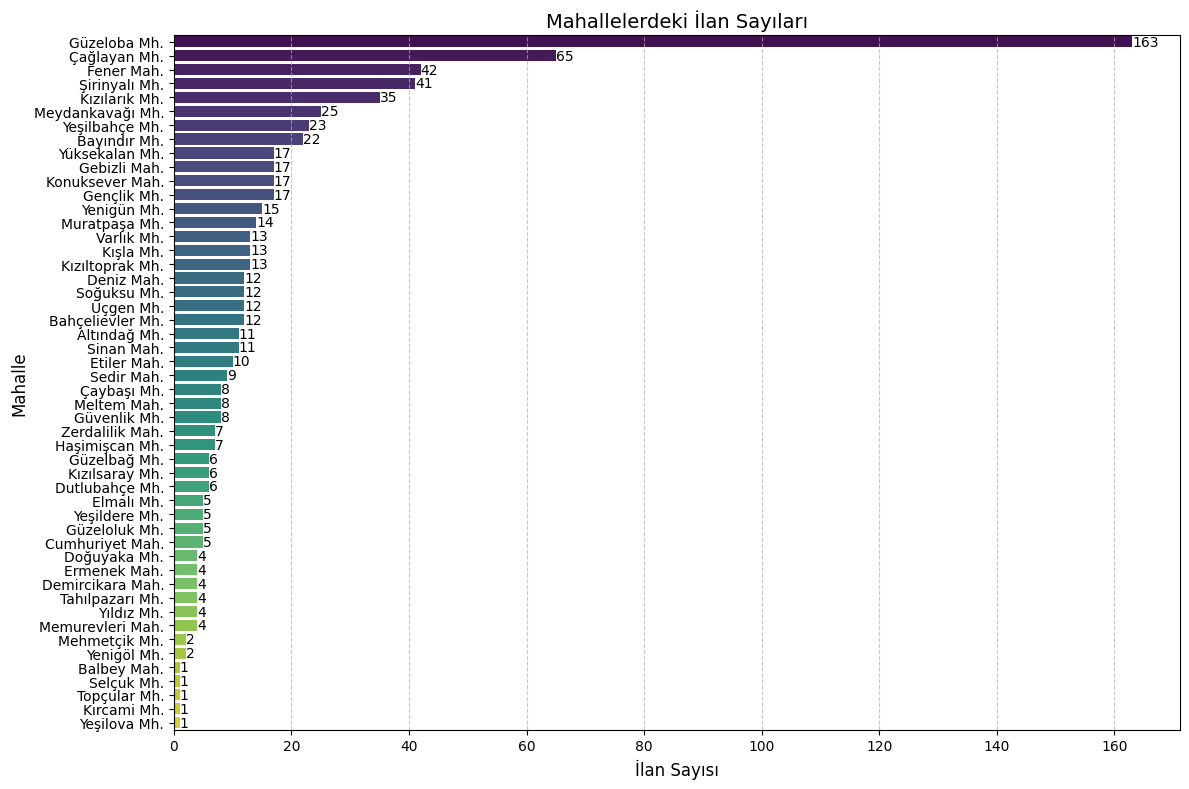

In [13]:
# Mahallelerin frekanslarını hesaplama
mahalle_counts = project_20["mahalle"].value_counts()

# Grafik oluşturma
plt.figure(figsize=(12, 8))
sns.barplot(y=mahalle_counts.index, x=mahalle_counts.values, palette='viridis')

# Ortalama frekansları etiketleme
for index, value in enumerate(mahalle_counts.values):
    plt.text(value, index, f'{value}', va='center', fontsize=10, color='black')

plt.title('Mahallelerdeki İlan Sayıları', fontsize=14)
plt.xlabel('İlan Sayısı', fontsize=12)
plt.ylabel('Mahalle', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Mahallelere göre ortalama fiyatlar 

C:\Users\ogulc\AppData\Local\Temp\ipykernel_18412\2820311720.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price.index, x=avg_price.values, palette='viridis')


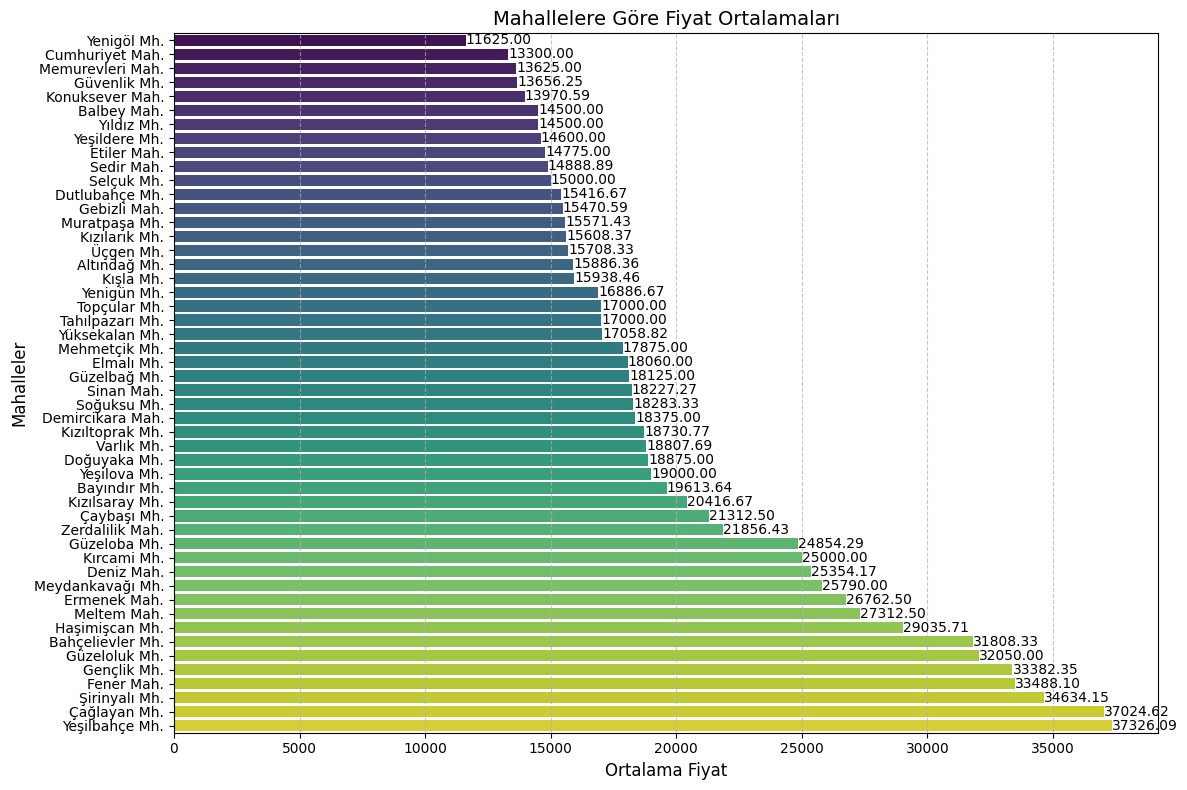

In [14]:
#Mahallelere göre ortalama fiyatlar (Bar grafiği)
price_of_neigh = project_20.groupby("mahalle")["fiyat"].mean().sort_values()
plt.figure(figsize=(12, 8))
avg_price = project_20.groupby("mahalle")["fiyat"].mean().sort_values()
    
# Yatay bar grafiği oluşturma
sns.barplot(y=avg_price.index, x=avg_price.values, palette='viridis')
    
# Ortalama fiyatları ekleme
for index, value in enumerate(avg_price.values):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10, color='black')
    
plt.title(f'Mahallelere Göre Fiyat Ortalamaları', fontsize=14)
plt.xlabel('Ortalama Fiyat', fontsize=12)
plt.ylabel("Mahalleler", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Harita üzerinde her mahalledeki ortalama fiyatlar 

In [15]:
"""
import geopandas as gpd
gdf = gpd.read_file("Muratpasa.geojson")
mahalle_ort = pd.DataFrame(project_20.groupby("mahalle")["fiyat"].mean()).reset_index()
"""

'\nimport geopandas as gpd\ngdf = gpd.read_file("Muratpasa.geojson")\nmahalle_ort = pd.DataFrame(project_20.groupby("mahalle")["fiyat"].mean()).reset_index()\n'

In [16]:
"""print(gdf.head(2), "\n", mahalle_ort.head(2))"""

'print(gdf.head(2), "\n", mahalle_ort.head(2))'

In [17]:
"""
gdf['mahalle'] = gdf['Name'].str.strip().str.replace(' Mh.', '')
mahalle_ort['mahalle'] = mahalle_ort['mahalle'].str.strip().str.replace(' Mh.', '')

# Veri setinizi GeoDataFrame ile birleştirin
gdf_new = gdf.merge(mahalle_ort, left_on='mahalle', right_on='mahalle', how = "left").drop(columns = "description", axis =1).fillna("Bilinmiyor")
gdf_new
"""

'\ngdf[\'mahalle\'] = gdf[\'Name\'].str.strip().str.replace(\' Mh.\', \'\')\nmahalle_ort[\'mahalle\'] = mahalle_ort[\'mahalle\'].str.strip().str.replace(\' Mh.\', \'\')\n\n# Veri setinizi GeoDataFrame ile birleştirin\ngdf_new = gdf.merge(mahalle_ort, left_on=\'mahalle\', right_on=\'mahalle\', how = "left").drop(columns = "description", axis =1).fillna("Bilinmiyor")\ngdf_new\n'

In [18]:
"""
# Grafik oluşturun
from shapely import wkt
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(column='fiyat', ax=ax, legend=True,
         cmap='OrRd', edgecolor='k',
         legend_kwds={'label': "Ortalama Kira Fiyatı (TL)",
                      'orientation': "horizontal"})

# Başlık ve eksen ayarları
ax.set_title('Antalya Mahalle Bazında Ortalama Kira Fiyatları')
ax.set_axis_off()

plt.show()
"""

'\n# Grafik oluşturun\nfrom shapely import wkt\nfig, ax = plt.subplots(1, 1, figsize=(12, 12))\ngdf.plot(column=\'fiyat\', ax=ax, legend=True,\n         cmap=\'OrRd\', edgecolor=\'k\',\n         legend_kwds={\'label\': "Ortalama Kira Fiyatı (TL)",\n                      \'orientation\': "horizontal"})\n\n# Başlık ve eksen ayarları\nax.set_title(\'Antalya Mahalle Bazında Ortalama Kira Fiyatları\')\nax.set_axis_off()\n\nplt.show()\n'

### Diğer kategorik sütunlar için bar grafikleri 

C:\Users\ogulc\AppData\Local\Temp\ipykernel_18412\2044667186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price.index, x=avg_price.values, palette='viridis')


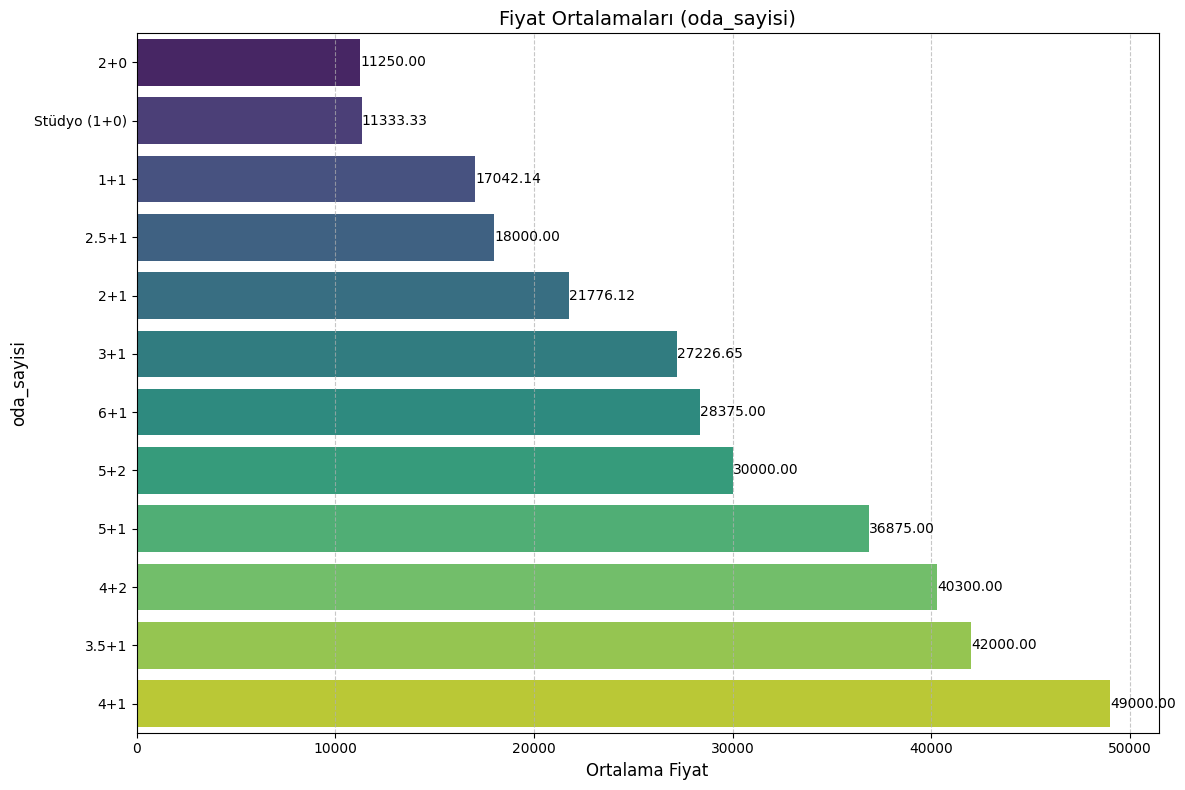

C:\Users\ogulc\AppData\Local\Temp\ipykernel_18412\2044667186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price.index, x=avg_price.values, palette='viridis')


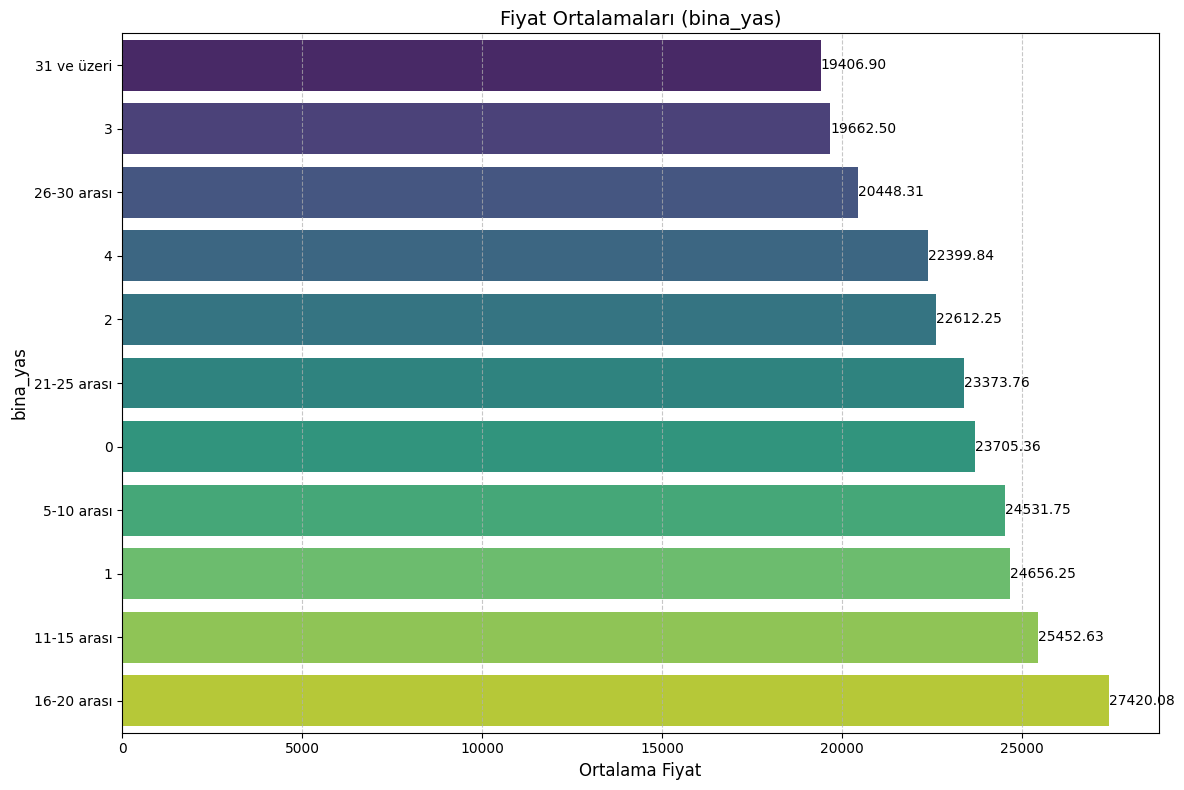

C:\Users\ogulc\AppData\Local\Temp\ipykernel_18412\2044667186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price.index, x=avg_price.values, palette='viridis')


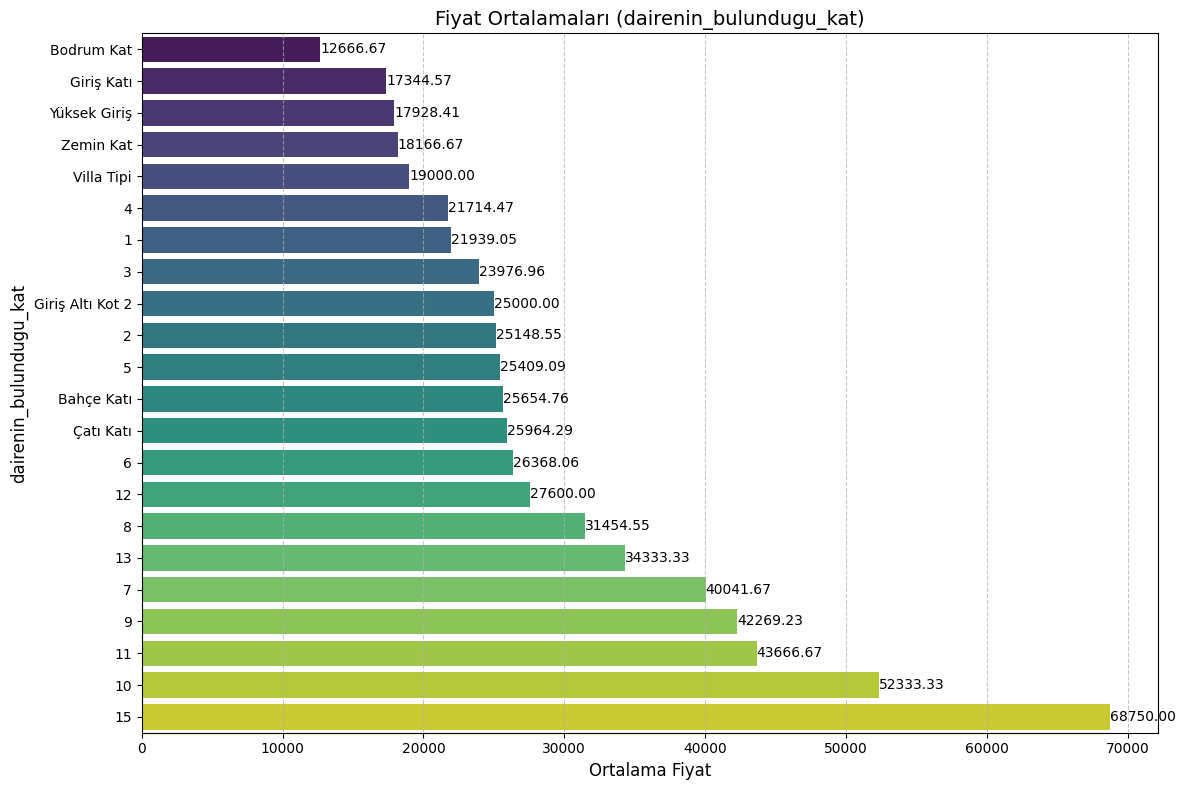

C:\Users\ogulc\AppData\Local\Temp\ipykernel_18412\2044667186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price.index, x=avg_price.values, palette='viridis')


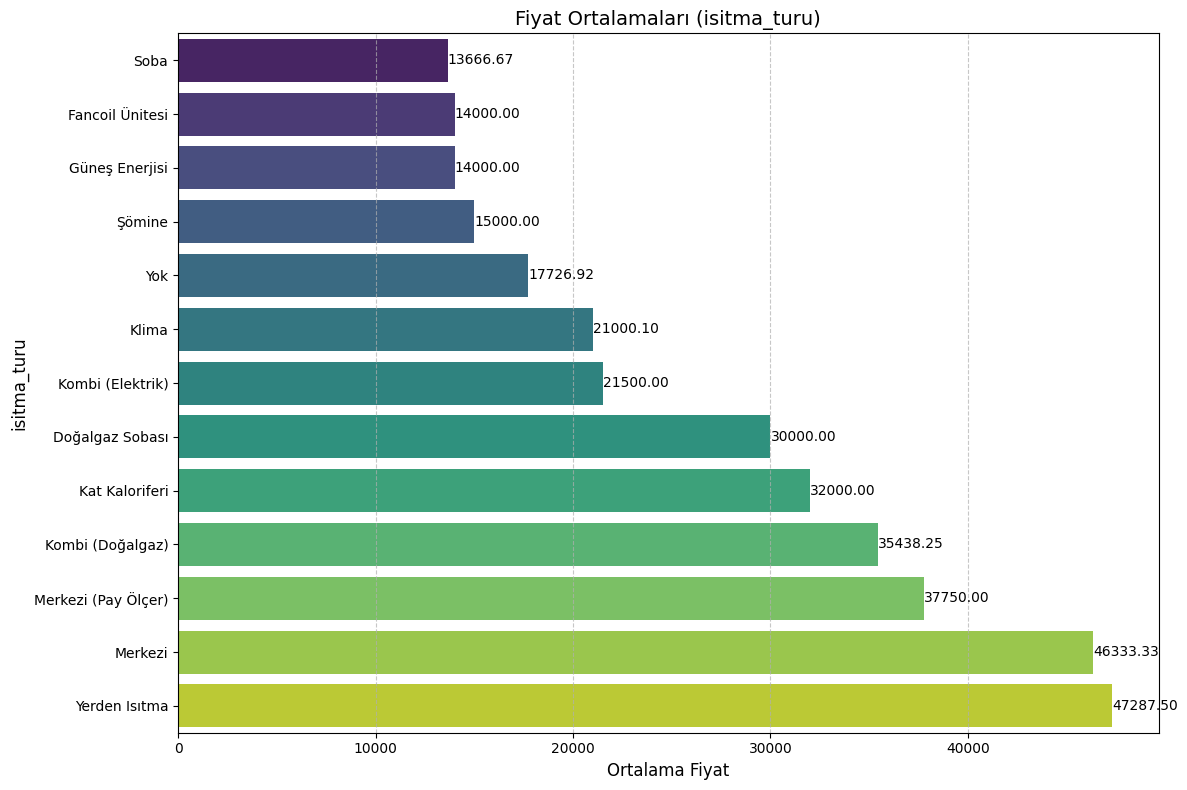

C:\Users\ogulc\AppData\Local\Temp\ipykernel_18412\2044667186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price.index, x=avg_price.values, palette='viridis')


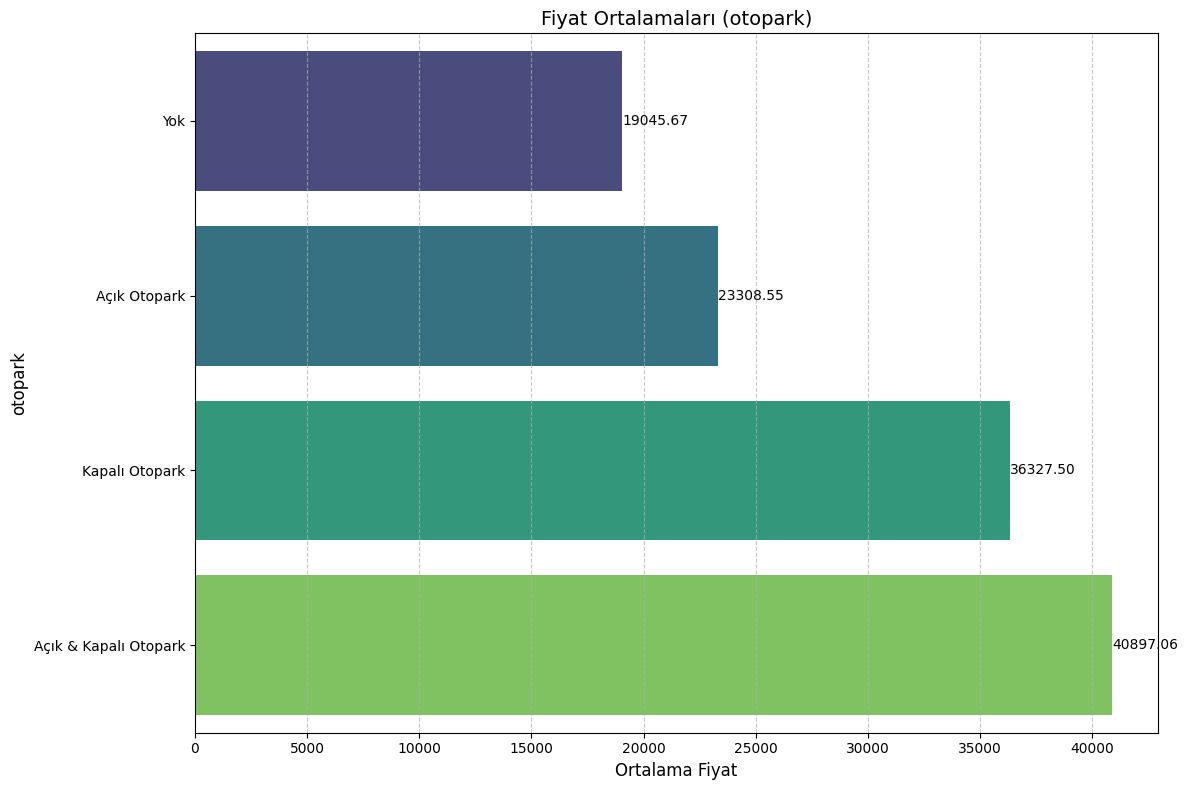

In [19]:
#Diğer kategorik sütunların kategorileri için Bar grafiği
def plot_avg_price_by_column(df, column_name):
    plt.figure(figsize=(12, 8))
    avg_price = df.groupby(column_name)['fiyat'].mean().sort_values()
    
    # Yatay bar grafiği oluşturma
    sns.barplot(y=avg_price.index, x=avg_price.values, palette='viridis')
    
    # Ortalama fiyatları ekleme
    for index, value in enumerate(avg_price.values):
        plt.text(value, index, f'{value:.2f}', va='center', fontsize=10, color='black')
    
    plt.title(f'Fiyat Ortalamaları ({column_name})', fontsize=14)
    plt.xlabel('Ortalama Fiyat', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
for column in project_20.select_dtypes(include= "object").drop(columns = ["mahalle", "site_icinde", "esya_durumu"], axis =1).columns:
    plot_avg_price_by_column(project_20, column)

### ANOVA veya T-testi ile kategorik sütunların Nominal mi Ordinal mi olduğunu tespit etme 

In [20]:
import pandas as pd 
from scipy.stats import ttest_ind, f_oneway

def perform_tests(data, categorical_columns, continuous_variable):
    """
    Verilen veri çerçevesindeki kategorik değişkenler ve sürekli değişken arasındaki ilişkileri test eder.
    
    Parameters:
    - data: pd.DataFrame
        Testlerin yapılacağı veri çerçevesi.
    - categorical_columns: list
        Testlerin yapılacağı kategorik değişkenlerin sütun adlarını içeren liste.
    - continuous_variable: str
        Testlerin yapılacağı sürekli değişkenin sütun adı.
        
    Returns:
    - results: dict
        Her bir kategorik değişken için test sonuçlarını içeren sözlük. 
        Sözlük anahtarları kategorik değişken adları, değerler ise test tipi, istatistik değeri ve p değerini içeren tuple'lardır.
    """
    # Test sonuçlarını tutmak için bir sözlük
    test_results = {}

    # Kategorik sütunları dolaşarak uygun testleri uygulama
    for column in categorical_columns:
        unique_values = data[column].nunique()
        
        if unique_values == 2:  # İki kategorili değişkenler için T-Testi
            category1 = data[data[column] == data[column].unique()[0]][continuous_variable]
            category2 = data[data[column] == data[column].unique()[1]][continuous_variable]
            
            stat, p = ttest_ind(category1, category2)
            test_results[column] = ('T-Testi', stat, p)
        
        elif unique_values > 2:  # Birden fazla kategorili değişkenler için ANOVA
            groups = [data[data[column] == category][continuous_variable] for category in data[column].unique()]
            
            stat, p = f_oneway(*groups)
            test_results[column] = ('ANOVA', stat, p)

    return test_results

In [21]:
categorical_columns = project_20.select_dtypes(include=['object', 'category']).columns
continuous_variable = 'fiyat'

results = perform_tests(project_20, categorical_columns, continuous_variable)

# Test sonuçlarını yazdırma
for column, (test_type, stat, p) in results.items():
    print(f"{column} için {test_type} sonucu: Stat=%.3f, p=%.3f" % (stat, p))
    if p > 0.05:
        print('Fark yok (fail to reject H0)')
    else:
        print('Fark var (reject H0)')
    print()

mahalle için ANOVA sonucu: Stat=3.948, p=0.000
Fark var (reject H0)

oda_sayisi için ANOVA sonucu: Stat=13.361, p=0.000
Fark var (reject H0)

bina_yas için ANOVA sonucu: Stat=1.336, p=0.207
Fark yok (fail to reject H0)

dairenin_bulundugu_kat için ANOVA sonucu: Stat=5.828, p=0.000
Fark var (reject H0)

isitma_turu için ANOVA sonucu: Stat=12.928, p=0.000
Fark var (reject H0)

otopark için ANOVA sonucu: Stat=29.941, p=0.000
Fark var (reject H0)

esya_durumu için T-Testi sonucu: Stat=3.868, p=0.000
Fark var (reject H0)

site_icinde için T-Testi sonucu: Stat=-7.584, p=0.000
Fark var (reject H0)



+ `bina_yas` sütunu dışındaki sütunlar, Ordinal (Sıralı) sütunlar olarak hesaplandı. Bu yüzden bu sütunlara **OrdinalEncoder** uygulayacağım ve `bina_yas` sütununa ise **OneHotEncoder** uygulayacağım. Ancak `bina_yas` sütununda çok fazla kategori olduğu için bu kategorileri, **OneHotEncoder** hesaplamasının veri boyutunu arttırmaması için, azaltacağım. Bunu da, `bina_yas` sütunundaki kategorilerin aralıklarını genişleterek yapacağım

In [22]:
#'bina_yas' sütununun kategorilerini azaltma
project_20["bina_yas"] = project_20["bina_yas"].astype("object")
print(project_20["bina_yas"].value_counts(), "\n")

def categorize_bina_yas(x):
    if x in ["0", "1", "2", "3", "4", "5-10 arası", "11-15 arası"]:
        return "0-15 arası"
    else:
        return "16-30+ arası"

# apply() fonksiyonunu kullanarak yeni kategorileri atama
project_20["bina_yas"] = project_20["bina_yas"].apply(categorize_bina_yas)

print(project_20["bina_yas"].value_counts())

bina_yas
5-10 arası     159
11-15 arası    152
16-20 arası    132
21-25 arası    101
26-30 arası     59
4               38
31 ve üzeri     29
0               28
2               20
1               16
3               16
Name: count, dtype: int64 

bina_yas
0-15 arası      429
16-30+ arası    321
Name: count, dtype: int64


In [23]:
project_20.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,16-30+ arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0-15 arası,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,0-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1


### OrdinalEncoder ve OneHotEncoder !!! (LabelEncoder Değil!! OrdinalEncoder kullanmam gerekiyor)

#### OneHotEncoder

In [24]:
#'bina_yas' sütununa OneHotEncoder
one_hot_encoder = OneHotEncoder()
bina_yas_encoded = one_hot_encoder.fit_transform(project_20[["bina_yas"]]).toarray()
bina_yas_encoded = pd.DataFrame(bina_yas_encoded)
bina_yas_encoded.head(4)


,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0


In [25]:
#OneHotEncoder uygulanan sütunun yeni halini veri setine ekleme
project_20_encoded = project_20.drop(columns = "bina_yas", axis = 1)
project_20_encoded = pd.concat([project_20_encoded.reset_index(drop=True), bina_yas_encoded.reset_index(drop=True)], axis=1)
project_20_encoded.columns = project_20_encoded.columns.astype("str")
project_20_encoded.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0,0.0,1.0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0,1.0,0.0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1,1.0,0.0


#### Karşılaştırma 

In [26]:
#OrdinalEncoder için kategorik sütunlardaki kategorilerin, kendi içlerinde karşılaştırılması 
for column in ["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu", 
               "otopark", "esya_durumu", "site_icinde"]:
    print(project_20.groupby(column)["fiyat"].mean().sort_values(), "\n")

mahalle
Yenigöl Mh.         11625.000000
Cumhuriyet Mah.     13300.000000
Memurevleri Mah.    13625.000000
Güvenlik Mh.        13656.250000
Konuksever Mah.     13970.588235
Balbey Mah.         14500.000000
Yıldız Mh.          14500.000000
Yeşildere Mh.       14600.000000
Etiler Mah.         14775.000000
Sedir Mah.          14888.888889
Selçuk Mh.          15000.000000
Dutlubahçe Mh.      15416.666667
Gebizli Mah.        15470.588235
Muratpaşa Mh.       15571.428571
Kızılarık Mh.       15608.371429
Üçgen Mh.           15708.333333
Altındağ Mh.        15886.363636
Kışla Mh.           15938.461538
Yenigün Mh.         16886.666667
Topçular Mh.        17000.000000
Tahılpazarı Mh.     17000.000000
Yüksekalan Mh.      17058.823529
Mehmetçik Mh.       17875.000000
Elmalı Mh.          18060.000000
Güzelbağ Mh.        18125.000000
Sinan Mah.          18227.272727
Soğuksu Mh.         18283.333333
Demircikara Mah.    18375.000000
Kızıltoprak Mh.     18730.769231
Varlık Mh.          18807.692308
Do

+ Biraz karışık bi durum aslında. Kategori sayısı fazla olan sütunlara **HybridEncoding**, yani **TargetEncoding** ve **FrequencyEncoding**'in harmanlandığı bir yöntem uygulamaya çalışacağım. Aralarındaki fark direkt olarak belli olan sütunlara ise **OrdinalEncoder** uygulayacağım. Hangi sütunlara ne uygulayacağımı aşağı yazıyorum:

**OrdinalEncoder**
+ `esya_durumu` (zaten uygulanmış biçimde)
+ `site_icinde` (zaten uygulanmış biçimde)
+ `sahibi` (zaten uygulanmış biçimde)
+ `otopark`

**HybridEncoding**
+ `mahalle`
+ `oda_sayisi`
+ `dairenin_bulundugu_kat`
+ `bina_kat_sayisi`
+ `isitma_turu`

#### OrdinalEncoder

In [27]:
#'otopark' sütunu için OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[["Yok", "Açık Otopark", "Kapalı Otopark", "Açık & Kapalı Otopark"]])
otopark_encoded = ordinal_encoder.fit_transform(project_20[["otopark"]])
otopark_encoded = pd.DataFrame(otopark_encoded)
otopark_encoded.columns = otopark_encoded.columns.astype("str")
otopark_encoded["otopark_enc"] = otopark_encoded["0"]
otopark_encoded = otopark_encoded.drop(columns = "0", axis = 1)

In [28]:
#OrdinalEncoder uygulanan sütunun yeni halini veri setine ekleme
project_20_encoded = project_20_encoded.drop(columns = "otopark", axis = 1)
project_20_encoded = pd.concat([project_20_encoded.reset_index(drop=True), otopark_encoded.reset_index(drop=True)], axis=1)

In [29]:
project_20_encoded.head(2)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,Giriş Katı,4.0,Klima,1.0,0,0,1,0,100,15000,0,0.0,1.0,1.0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,1,5.0,Kombi (Doğalgaz),1.0,1,1,0,1,1500,30000,0,1.0,0.0,2.0


#### HybridEncoder

In [30]:
# Kategorik sütunlar (Bu listeyi güncelleyin)
categorical_columns = ['mahalle', 'oda_sayisi', 'dairenin_bulundugu_kat', 'bina_kat_sayisi', 'isitma_turu']

# Hibrit encoding işlemini gerçekleştiren fonksiyon
def apply_hybrid_encoding(df, column_name):
    # Frekans encoding hesapla
    freq_encoding = df[column_name].value_counts() / len(df)
    
    # Target encoding hesapla
    mean_target_encoding = df.groupby(column_name)['fiyat'].mean()
    
    # Frekans ve target encoding değerlerini DataFrame'e ekle
    freq_map = df[column_name].map(freq_encoding)
    target_map = df[column_name].map(mean_target_encoding)
    
    # Hibrit encoding hesapla
    df[f"{column_name}_hyb"] = freq_map * target_map

# Kategorik sütunlar için hibrit encoding uygulama
for column in categorical_columns:
    apply_hybrid_encoding(project_20_encoded, column)
    
project_20_encoded

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,...,depozito,sahibi,0,1,otopark_enc,mahalle_hyb,oda_sayisi_hyb,dairenin_bulundugu_kat_hyb,bina_kat_sayisi_hyb,isitma_turu_hyb
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,Giriş Katı,4.0,Klima,1.0,0,...,15000,0,0.0,1.0,1.0,575.333333,8100.717333,1063.800000,5251.185333,13972.064000
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,1,5.0,Kombi (Doğalgaz),1.0,1,...,30000,0,1.0,0.0,2.0,227.333333,9874.200000,4007.533333,2679.333333,7276.653333
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,3,4.0,Klima,1.0,1,...,25000,1,1.0,0.0,1.0,5401.666667,9874.200000,3260.866667,5251.185333,13972.064000
3,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,2,3.0,Doğalgaz Sobası,2.0,0,...,30000,0,1.0,0.0,1.0,1893.333333,9874.200000,4660.864000,3565.466667,40.000000
4,Çağlayan Mh.,37500.0,320.0,300.0,4+2,8,8.0,Klima,3.0,1,...,37500,0,0.0,1.0,1.0,3208.800000,268.666667,461.333333,1378.000000,13972.064000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Güzeloba Mh.,16000.0,120.0,110.0,2+1,2,3.0,Klima,1.0,1,...,16000,0,0.0,1.0,1.0,5401.666667,8100.717333,4660.864000,3565.466667,13972.064000
746,Soğuksu Mh.,25000.0,170.0,160.0,3+1,11,17.0,Kombi (Doğalgaz),1.0,1,...,25000,0,1.0,0.0,3.0,292.533333,9874.200000,349.333333,33.333333,7276.653333
747,Şirinyalı Mh.,30000.0,220.0,200.0,5+1,12,13.0,Klima,2.0,1,...,30000,0,1.0,0.0,1.0,1893.333333,393.333333,184.000000,661.333333,13972.064000
748,Muratpaşa Mh.,20000.0,70.0,65.0,2+1,Çatı Katı,5.0,Kombi (Doğalgaz),1.0,1,...,20000,1,1.0,0.0,1.0,290.666667,8100.717333,242.333333,2679.333333,7276.653333


In [31]:
#'isitma_turu' sütunundan yola çıkarak doğruluğunu kontrol edelim
print(project_20_encoded["isitma_turu"].head(2), "\n\n", project_20_encoded["isitma_turu_hyb"].head(2))
project_20_encoded.groupby("isitma_turu")["isitma_turu_hyb"].mean().sort_values()

0               Klima
1    Kombi (Doğalgaz)
Name: isitma_turu, dtype: object 

 0    13972.064000
1     7276.653333
Name: isitma_turu_hyb, dtype: float64


isitma_turu
Fancoil Ünitesi           18.666667
Şömine                    20.000000
Güneş Enerjisi            37.333333
Doğalgaz Sobası           40.000000
Soba                      54.666667
Kombi (Elektrik)          57.333333
Kat Kaloriferi           170.666667
Merkezi (Pay Ölçer)      201.333333
Merkezi                  370.666667
Yerden Isıtma            504.400000
Yok                     1536.333333
Kombi (Doğalgaz)        7276.653333
Klima                  13972.064000
Name: isitma_turu_hyb, dtype: float64

In [32]:
project_20_encoded.groupby("isitma_turu")["fiyat"].mean().sort_values()

isitma_turu
Soba                   13666.666667
Fancoil Ünitesi        14000.000000
Güneş Enerjisi         14000.000000
Şömine                 15000.000000
Yok                    17726.923077
Klima                  21000.096192
Kombi (Elektrik)       21500.000000
Doğalgaz Sobası        30000.000000
Kat Kaloriferi         32000.000000
Kombi (Doğalgaz)       35438.246753
Merkezi (Pay Ölçer)    37750.000000
Merkezi                46333.333333
Yerden Isıtma          47287.500000
Name: fiyat, dtype: float64

+ HybridEncoding yanlış sonuç veriyor. Eğer doğru sonuç verseydi `project_20_encoded.groupby("isitma_turu")["isitma_turu_hyb"].mean().sort_values()` ve `project_20_encoded.groupby("isitma_turu")["fiyat"].mean().sort_values()` kodlarının sıralamaları aynı olurdu. Bu yüzden bunu kullanamam

In [33]:
project_20_encoded = project_20_encoded.drop(columns = ["mahalle_hyb","oda_sayisi_hyb","dairenin_bulundugu_kat_hyb","bina_kat_sayisi_hyb","isitma_turu_hyb"], axis = 1)

In [34]:
project_20_encoded.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,Giriş Katı,4.0,Klima,1.0,0,0,1,0,100,15000,0,0.0,1.0,1.0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,1,5.0,Kombi (Doğalgaz),1.0,1,1,0,1,1500,30000,0,1.0,0.0,2.0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,3,4.0,Klima,1.0,1,0,0,0,500,25000,1,1.0,0.0,1.0


+ **TargetEncoding** uygulayacağım direkt olarak. Bu metot, kategorinin yerine `fiyat` sütunundaki ortalamayı atayacak. Ancak bundan önce veri sızıntısı olmaması için veri setini Train ve Test olarak ayırmam lazım

## Separting, Splitting Data and TargetEncoding, StandardScaler

In [35]:
project_20.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,16-30+ arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0-15 arası,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,0-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1


In [36]:
project_20_encoded.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,Giriş Katı,4.0,Klima,1.0,0,0,1,0,100,15000,0,0.0,1.0,1.0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,1,5.0,Kombi (Doğalgaz),1.0,1,1,0,1,1500,30000,0,1.0,0.0,2.0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,3,4.0,Klima,1.0,1,0,0,0,500,25000,1,1.0,0.0,1.0


### Splitting (train and test)

In [37]:
#Splitting
train_df, test_df = train_test_split(project_20_encoded, test_size = 0.2, random_state=42)
print("Train boyutu:", train_df.shape, "\n", "Test boyutu:", test_df.shape)

Train boyutu: (600, 19) 
 Test boyutu: (150, 19)


In [38]:
train_df.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
595,Varlık Mh.,20000.0,160.0,150.0,3+1,6,7.0,Klima,2.0,1,1,0,0,0,20000,0,0.0,1.0,0.0
131,Güzeloba Mh.,15000.0,65.0,60.0,1+1,2,8.0,Klima,1.0,0,1,1,1,1000,15000,0,1.0,0.0,1.0
44,Güzeloba Mh.,21000.0,55.0,50.0,1+1,2,2.0,Klima,1.0,0,1,1,1,1000,35000,0,1.0,0.0,2.0


In [39]:
test_df.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
506,Altındağ Mh.,11000.0,35.0,30.0,1+1,Giriş Katı,4.0,Klima,1.0,0,0,0,0,0,22000,0,0.0,1.0,0.0
357,Konuksever Mah.,11000.0,90.0,85.0,2+1,1,4.0,Yok,1.0,1,0,0,0,100,11000,0,1.0,0.0,1.0
133,Çağlayan Mh.,22000.0,70.0,56.0,1+1,Yüksek Giriş,4.0,Kombi (Doğalgaz),1.0,1,1,1,0,400,0,0,1.0,0.0,2.0


### TargetEncoding

In [40]:
import category_encoders as ce
#Eğitim verileri ile TargetEncoder'ı eğitme 
target_encoder = ce.TargetEncoder(cols = ["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", 
                                          "bina_kat_sayisi", "isitma_turu"])
target_encoder.fit(train_df[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]], train_df["fiyat"])

# Eğitim ve test verilerini dönüştürme
train_encoded = train_df.copy()
test_encoded = test_df.copy()


#Eğitim ve test verilerini dönüştürme
train_encoded[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]] = target_encoder.transform(train_df[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]])
test_encoded[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]] = target_encoder.transform(test_df[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]])

c:\Users\ogulc\.conda\envs\PR\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\ogulc\.conda\envs\PR\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\ogulc\.conda\envs\PR\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is dep

In [41]:
train_encoded

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
595,23166.122045,20000.0,160.0,150.0,27621.136358,25988.065791,25737.178793,21215.989924,2.0,1,1,0,0,0,20000,0,0.0,1.0,0.0
131,25449.987760,15000.0,65.0,60.0,17288.216945,25128.403181,27303.411432,21215.989924,1.0,0,1,1,1,1000,15000,0,1.0,0.0,1.0
44,25449.987760,21000.0,55.0,50.0,17288.216945,25128.403181,23826.364232,21215.989924,1.0,0,1,1,1,1000,35000,0,1.0,0.0,2.0
70,33284.400130,80000.0,210.0,190.0,27621.136358,29006.196602,29134.663024,35908.371953,1.0,1,1,1,1,0,160000,0,0.0,1.0,3.0
672,38939.582463,40000.0,130.0,120.0,27621.136358,22254.010189,21347.206449,21215.989924,2.0,1,1,1,0,300,80000,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,25534.362269,25000.0,110.0,90.0,22480.973217,22254.010189,18767.096686,21215.989924,1.0,1,1,1,0,0,25000,0,1.0,0.0,1.0
106,31040.349808,25000.0,180.0,165.0,27621.136358,25389.253254,18767.096686,18461.550010,1.0,1,1,0,0,300,0,0,0.0,1.0,1.0
270,23189.833187,18000.0,135.0,120.0,27621.136358,22254.010189,27748.650103,21215.989924,1.0,1,1,0,0,0,0,1,1.0,0.0,1.0
435,31040.349808,30000.0,160.0,145.0,27621.136358,25128.403181,23826.364232,21215.989924,1.0,1,0,1,1,0,0,0,0.0,1.0,0.0


In [42]:
test_encoded

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
506,22473.597885,11000.0,35.0,30.0,17288.216945,18480.276027,18767.096686,21215.989924,1.0,0,0,0,0,0,22000,0,0.0,1.0,0.0
357,21888.650293,11000.0,90.0,85.0,22480.973217,22254.010189,18767.096686,18461.550010,1.0,1,0,0,0,100,11000,0,1.0,0.0,1.0
133,38939.582463,22000.0,70.0,56.0,17288.216945,18256.535573,18767.096686,35908.371953,1.0,1,1,1,0,400,0,0,1.0,0.0,2.0
250,28601.258406,20000.0,150.0,140.0,27621.136358,25128.403181,27193.299889,21215.989924,1.0,1,1,0,0,450,20000,0,0.0,1.0,1.0
299,22087.086352,25000.0,180.0,160.0,24934.583544,22540.982889,18767.096686,21215.989924,2.0,1,1,1,0,150,75000,1,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,22622.114827,17000.0,150.0,140.0,27621.136358,22540.982889,32232.883963,21215.989924,1.0,1,1,0,0,0,16000,0,0.0,1.0,1.0
90,25449.987760,14000.0,55.0,45.0,17288.216945,22254.010189,23826.364232,21215.989924,1.0,1,0,0,0,0,0,0,1.0,0.0,0.0
393,22482.335239,16000.0,145.0,135.0,27621.136358,25128.403181,18767.096686,21215.989924,1.0,1,0,0,0,0,17000,0,0.0,1.0,0.0
685,31040.349808,25000.0,165.0,160.0,27621.136358,29916.551721,32232.883963,18461.550010,2.0,1,1,0,1,2000,25000,0,1.0,0.0,1.0


### Separating

In [43]:
X_train = train_encoded.drop(columns="fiyat", axis = 1)
y_train = train_encoded["fiyat"]

X_test = test_encoded.drop(columns = "fiyat", axis = 1)
y_test = test_encoded["fiyat"]

In [44]:
X_train.head(3)

,mahalle,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
595,23166.122045,160.0,150.0,27621.136358,25988.065791,25737.178793,21215.989924,2.0,1,1,0,0,0,20000,0,0.0,1.0,0.0
131,25449.987760,65.0,60.0,17288.216945,25128.403181,27303.411432,21215.989924,1.0,0,1,1,1,1000,15000,0,1.0,0.0,1.0
44,25449.987760,55.0,50.0,17288.216945,25128.403181,23826.364232,21215.989924,1.0,0,1,1,1,1000,35000,0,1.0,0.0,2.0



mahalle (+)
	brut_alan_m2 (+)
    	net_alan_m2(+)	
oda_sayisi	(+)
dairenin_bulundugu_kat (+)
	bina_kat_sayisi (+)
	isitma_turu	(+)
    banyo_sayisi (+)
    	balkon (+)
        	asansor (+)	
    esya_durumu (+)
    	site_icinde (+)
        	aidat	(+)

    depozito (+)	
    sahibi	(-)
    0	(+)
    1	(+)
    otopark_enc (+)

### StandardScaler

In [45]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## Fitting model and comparing with DummyRegressor

In [46]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean").fit(X_train_scaled, y_train)
print("DummyRegressor'un test setindeki skoru:", dummy.score(X_test_scaled, y_test))

DummyRegressor'un test setindeki skoru: -0.03640279610806885


+ Veri setinde dengesizlik yok. En iyi modeli bulmaya çalışalım 

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

regression_models = {"Decision Tree": DecisionTreeRegressor(),
                   "Random Forest": RandomForestRegressor(),
                   "Gradient Boosting": GradientBoostingRegressor(),
                   "Ada Boost": AdaBoostRegressor(),
                   "KNN": KNeighborsRegressor(),
                   "Linear Regression": LinearRegression(),
                   "Lasso Regression": Lasso(),
                   "Ridge Regression": Ridge(),
                   "Linear SVR": SVR(kernel = "linear"),
                   "RBF SVR": SVR(kernel = "rbf"),
                   "Polynomial SVR": SVR(kernel = "poly")}


model_names = []
train_score = []
test_score = []
mse_score = []
r2score = []

for name, reg in regression_models.items():
    reg.fit(X_train_scaled, y_train)
    predictions = reg.predict(X_test_scaled)
    score_train = reg.score(X_train_scaled, y_train)
    score_test = reg.score(X_test_scaled, y_test)
    score_mse = mean_squared_error(y_test, predictions)
    score_r2 = r2_score(y_test, predictions)
    
    model_names.append(name)
    train_score.append(score_train)
    test_score.append(score_test)
    mse_score.append(score_mse)
    r2score.append(score_r2)
    
    print(f"{name} Train setindeki doğruluk: {score_train}")
    print(f"{name} Test setindeki doğruluk: {score_test}")
    print(f"{name} MSE Skoru: {score_mse}")
    print(f"{name} R^2 Skoru: {score_r2}\n")

Decision Tree Train setindeki doğruluk: 0.999997818816697
Decision Tree Test setindeki doğruluk: 0.01663017332075223
Decision Tree MSE Skoru: 141062083.50666666
Decision Tree R^2 Skoru: 0.01663017332075223

Random Forest Train setindeki doğruluk: 0.9270600539111649
Random Forest Test setindeki doğruluk: 0.7091736411234808
Random Forest MSE Skoru: 41718355.60616669
Random Forest R^2 Skoru: 0.7091736411234808

Gradient Boosting Train setindeki doğruluk: 0.9276297609867362
Gradient Boosting Test setindeki doğruluk: 0.5761317816155467
Gradient Boosting MSE Skoru: 60802896.728569694
Gradient Boosting R^2 Skoru: 0.5761317816155467

Ada Boost Train setindeki doğruluk: 0.5970194912287434
Ada Boost Test setindeki doğruluk: -0.07593647574117668
Ada Boost MSE Skoru: 154340551.10415298
Ada Boost R^2 Skoru: -0.07593647574117668

KNN Train setindeki doğruluk: 0.6483704733259655
KNN Test setindeki doğruluk: 0.5833032301978482
KNN MSE Skoru: 59774169.33493333
KNN R^2 Skoru: 0.5833032301978482

Linear 

+ Modellerin neredeyse hepsi **overfitting** sorununa sahip. Şimdilik bunu gözardı ediyorum ve en kullanılabilir olan `RandomForest` modelini baştan kuruyorum 

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [49]:
from sklearn.metrics import mean_absolute_error
rfr_pred = rfr.predict(X_test_scaled)
print("RandomForest modelinin Train setindeki skoru:", rfr.score(X_train_scaled, y_train))
print("RandomForest modelinin Test setindeki skoru:", rfr.score(X_test_scaled, y_test))
print("RandomForest modelinin MSE skoru:", mean_squared_error(y_test, rfr_pred))
print("RandomForest modelinin R^2 skoru:", r2_score(y_test, rfr_pred))
print("RandomForest modelinin MAE skoru:", mean_absolute_error(y_test, rfr_pred))

RandomForest modelinin Train setindeki skoru: 0.9199063429624483
RandomForest modelinin Test setindeki skoru: 0.671519992562007
RandomForest modelinin MSE skoru: 47119682.73010923
RandomForest modelinin R^2 skoru: 0.671519992562007
RandomForest modelinin MAE skoru: 3780.4776888888887


# Başka Yöntemlerle Tekrardan Bütün İşlemlerin Yapılması

+ `TargetEncoding` öncesindeki veri seti üzerinde tekrar çalışacağım. Bu başlıktan önce, bütün kategorik sütunlara **TargetEncoding** uygulamıştım. Bu sefer bunu değiştirip, her sütuna gerekli olan Encodingleri uyguladıktan sonra modeli tekrar kuracağım 

In [54]:
project_20.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,16-30+ arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0-15 arası,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,0-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1


In [50]:
project_20_encoded.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,Giriş Katı,4.0,Klima,1.0,0,0,1,0,100,15000,0,0.0,1.0,1.0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,1,5.0,Kombi (Doğalgaz),1.0,1,1,0,1,1500,30000,0,1.0,0.0,2.0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,3,4.0,Klima,1.0,1,0,0,0,500,25000,1,1.0,0.0,1.0


In [66]:
for col in project_20_encoded.select_dtypes(include = "object").columns:
    print(f"{col}({project_20_encoded[col].dtype}) sütunundaki eşsiz değer sayısı:", project_20_encoded[col].nunique(), "\n")

mahalle(object) sütunundaki eşsiz değer sayısı: 50 

oda_sayisi(object) sütunundaki eşsiz değer sayısı: 12 

dairenin_bulundugu_kat(object) sütunundaki eşsiz değer sayısı: 22 

isitma_turu(object) sütunundaki eşsiz değer sayısı: 13 

esya_durumu(object) sütunundaki eşsiz değer sayısı: 2 

site_icinde(object) sütunundaki eşsiz değer sayısı: 2 



Bu sütunlar arasında hangi sütuna, hangi Encoding yöntemi uygulacağımı aşağıya yazıyorum: 

+ `mahalle` ve `dairenin_bulundugu_kat`: **TargetEncoding**. Mahalleler arasında ordinal bir fark var büyük ihtimal ancak bunların arasındaki sıralamayı bilmiyorum. Olmadığını varsaydığımda ise OneHotEncoding uygularsam eğer veri setindeki boyut düzeyi çok artacağın TargetEncoding en mantıklı yol.
+ `oda_sayisi`: **OrdinalEncoding**. Tahmin edilebileceği üzere emlakçılıkda oda sayısı arttıkça evin fiyatı veya kirası da artacaktır. Bunun olmadığı durumlar olabilir. Daha lüks bir semtte ve lüks bir 1+0 bir ev, daha eski bir 3+1 eve göre daha yüksek fiyata sahip olabilir ancak bu bir istisnadır bence. O yüzden OrdinalEncoding uygulayacağım 
+ `isitma_turu`: **OrdinalEncoding**. Isıtma türleri dairenin fiyatını mutlaka etkileyecektir. 
+ `esya_durumu` ve `site_icinde`: Bu ikisi zaten 0 ve 1 şeklinde. O yüzden bunlara da ellemeyeceğim 

## `oda_sayisi` için OrdinalEncoding

In [67]:
project_20_encoded["oda_sayisi"].value_counts()

oda_sayisi
2+1             279
3+1             272
1+1             140
4+1              31
5+1               8
4+2               5
2+0               4
6+1               4
Stüdyo (1+0)      3
5+2               2
2.5+1             1
3.5+1             1
Name: count, dtype: int64

In [68]:
project_20_encoded[project_20_encoded["oda_sayisi"] == "2.5+1"]

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
126,Varlık Mh.,18000.0,110.0,100.0,2.5+1,6,7.0,Klima,1.0,1,1,0,0,100,19000,0,0.0,1.0,1.0


In [69]:
project_20_encoded[project_20_encoded["oda_sayisi"] == "3.5+1"]

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc
542,Yeşilbahçe Mh.,42000.0,195.0,185.0,3.5+1,5,10.0,Kombi (Doğalgaz),2.0,1,1,1,1,1100,85000,0,0.0,1.0,3.0


In [75]:
project_20_encoded["oda_sayisi"].str.strip()

0      2+1
1      3+1
2      3+1
3      3+1
4      4+2
      ... 
745    2+1
746    3+1
747    5+1
748    2+1
749    2+1
Name: oda_sayisi, Length: 750, dtype: object

In [85]:
project_20_encoded.loc[project_20_encoded["oda_sayisi"] == "2.5+1", "oda_sayisi"] = "5+1"
project_20_encoded.loc[project_20_encoded["oda_sayisi"] == "3.5+1", "oda_sayisi"] = "5+1"

project_20.loc[project_20["oda_sayisi"] == "2.5+1", "oda_sayisi"] = "5+1"
project_20.loc[project_20["oda_sayisi"] == "3.5+1", "oda_sayisi"] = "5+1"

In [77]:
project_20_encoded["oda_sayisi"].value_counts()

oda_sayisi
2+1             279
3+1             272
1+1             140
4+1              31
5+1              10
4+2               5
2+0               4
6+1               4
Stüdyo (1+0)      3
5+2               2
Name: count, dtype: int64

In [82]:
project_20_encoded.groupby("oda_sayisi")["fiyat"].mean().sort_values()

oda_sayisi
2+0             11250.000000
Stüdyo (1+0)    11333.333333
1+1             17042.142857
2+1             21776.121864
3+1             27226.654412
6+1             28375.000000
5+2             30000.000000
5+1             35500.000000
4+2             40300.000000
4+1             49000.000000
Name: fiyat, dtype: float64

In [78]:
project_20_encoded[project_20_encoded["oda_sayisi"] == "4+2"]["fiyat"].mean()

np.float64(40300.0)

In [79]:
project_20_encoded[project_20_encoded["oda_sayisi"] == "6+1"]["fiyat"].mean()

np.float64(28375.0)

In [91]:
#'oda_sayisi' sütunu için OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[["2+0", "Stüdyo (1+0)", "1+1", "2+1", "3+1", "6+1", "5+2", "5+1", "4+2", "4+1"]])
oda_encoded = ordinal_encoder.fit_transform(project_20[["oda_sayisi"]]) + 1
oda_encoded = pd.DataFrame(oda_encoded)
oda_encoded.columns = oda_encoded.columns.astype("str")
oda_encoded["oda_enc"] = oda_encoded["0"]
oda_encoded = oda_encoded.drop(columns="0", axis =1)

In [92]:
#OrdinalEncoder uygulanan sütunun yeni halini veri setine ekleme
project_20_encoded = project_20_encoded.drop(columns="oda_sayisi", axis = 1)
project_20_encoded = pd.concat([project_20_encoded.reset_index(drop=True), oda_encoded.reset_index(drop=True)], axis =1)

In [93]:
project_20_encoded.head(2)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc,oda_enc
0,Bayındır Mh.,15000.0,90.0,80.0,Giriş Katı,4.0,Klima,1.0,0,0,1,0,100,15000,0,0.0,1.0,1.0,4.0
1,Çaybaşı Mh.,29000.0,145.0,135.0,1,5.0,Kombi (Doğalgaz),1.0,1,1,0,1,1500,30000,0,1.0,0.0,2.0,5.0


## `isitma_turu` için OrdinalEncoding

In [95]:
project_20_encoded["isitma_turu"].value_counts()

isitma_turu
Klima                  499
Kombi (Doğalgaz)       154
Yok                     65
Yerden Isıtma            8
Merkezi                  6
Kat Kaloriferi           4
Merkezi (Pay Ölçer)      4
Soba                     3
Güneş Enerjisi           2
Kombi (Elektrik)         2
Doğalgaz Sobası          1
Şömine                   1
Fancoil Ünitesi          1
Name: count, dtype: int64

In [99]:
project_20_encoded["isitma_turu"].str.strip()

0                 Klima
1      Kombi (Doğalgaz)
2                 Klima
3       Doğalgaz Sobası
4                 Klima
             ...       
745               Klima
746    Kombi (Doğalgaz)
747               Klima
748    Kombi (Doğalgaz)
749               Klima
Name: isitma_turu, Length: 750, dtype: object

In [100]:
project_20_encoded.groupby("isitma_turu")["fiyat"].mean().sort_values()

isitma_turu
Soba                   13666.666667
Fancoil Ünitesi        14000.000000
Güneş Enerjisi         14000.000000
Şömine                 15000.000000
Yok                    17726.923077
Klima                  21000.096192
Kombi (Elektrik)       21500.000000
Doğalgaz Sobası        30000.000000
Kat Kaloriferi         32000.000000
Kombi (Doğalgaz)       35438.246753
Merkezi (Pay Ölçer)    37750.000000
Merkezi                46333.333333
Yerden Isıtma          47287.500000
Name: fiyat, dtype: float64

In [106]:
ordinal_encoder = OrdinalEncoder(categories=[["Soba", "Fancoil Ünitesi", "Güneş Enerjisi", "Şömine", "Yok", "Klima", "Kombi (Elektrik)", 
                                              "Doğalgaz Sobası", "Kat Kaloriferi", "Kombi (Doğalgaz)", "Merkezi (Pay Ölçer)", 
                                              "Merkezi", "Yerden Isıtma"]])
isitma_encoded = ordinal_encoder.fit_transform(project_20[["isitma_turu"]])
isitma_encoded = pd.DataFrame(isitma_encoded)
isitma_encoded.columns = isitma_encoded.columns.astype("str")
isitma_encoded["isitma_enc"] = isitma_encoded["0"]
isitma_encoded = isitma_encoded.drop(columns="0", axis = 1)

In [107]:
project_20_encoded = project_20_encoded.drop(columns="isitma_turu", axis = 1)
project_20_encoded = pd.concat([project_20_encoded.reset_index(drop=True), isitma_encoded.reset_index(drop=True)], axis = 1)

In [108]:
project_20_encoded.head(2)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,dairenin_bulundugu_kat,bina_kat_sayisi,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc,oda_enc,isitma_enc
0,Bayındır Mh.,15000.0,90.0,80.0,Giriş Katı,4.0,1.0,0,0,1,0,100,15000,0,0.0,1.0,1.0,4.0,5.0
1,Çaybaşı Mh.,29000.0,145.0,135.0,1,5.0,1.0,1,1,0,1,1500,30000,0,1.0,0.0,2.0,5.0,9.0


## `mahalle` ve `dairenin_bulundugu_kat` sütununa TargetEncoding

+ Veri sızıntısı olmasın diye önce veri setini bölüp sonrasında Train ve Test olarak ayırmamız lazım 

### Splitting (Train and Test)

In [113]:
#Splitting
train_df, test_df = train_test_split(project_20_encoded, test_size=0.2, random_state=42)
print("Train boyutu:", train_df.shape, "\n", "Test boyutu:", test_df.shape)

Train boyutu: (600, 19) 
 Test boyutu: (150, 19)


### TargetEncoding

In [114]:
#Eğitim verileri ile TargetEncoder'ı Eğitme
target_encoder = ce.TargetEncoder(cols = ["mahalle", "dairenin_bulundugu_kat"])
target_encoder.fit(train_df[["mahalle", "dairenin_bulundugu_kat"]], train_df["fiyat"])

TargetEncoder(cols=['mahalle', 'dairenin_bulundugu_kat'])

In [115]:
#Eğitim ve Test verilini dönüştürme
train_encoded = train_df.copy()
test_encoded = test_df.copy()

In [116]:
#Eğitim ve Test verilerini dönüştürme
train_encoded[["mahalle", "dairenin_bulundugu_kat"]] = target_encoder.transform(train_df[["mahalle", "dairenin_bulundugu_kat"]])
test_encoded[["mahalle", "dairenin_bulundugu_kat"]] = target_encoder.transform(test_df[["mahalle", "dairenin_bulundugu_kat"]])

In [117]:
train_encoded.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,dairenin_bulundugu_kat,bina_kat_sayisi,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc,oda_enc,isitma_enc
595,23166.122045,20000.0,160.0,150.0,25988.065791,7.0,2.0,1,1,0,0,0,20000,0,0.0,1.0,0.0,5.0,5.0
131,25449.987760,15000.0,65.0,60.0,25128.403181,8.0,1.0,0,1,1,1,1000,15000,0,1.0,0.0,1.0,3.0,5.0
44,25449.987760,21000.0,55.0,50.0,25128.403181,2.0,1.0,0,1,1,1,1000,35000,0,1.0,0.0,2.0,3.0,5.0


In [118]:
test_encoded.head(3)

,mahalle,fiyat,brut_alan_m2,net_alan_m2,dairenin_bulundugu_kat,bina_kat_sayisi,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,0,1,otopark_enc,oda_enc,isitma_enc
506,22473.597885,11000.0,35.0,30.0,18480.276027,4.0,1.0,0,0,0,0,0,22000,0,0.0,1.0,0.0,3.0,5.0
357,21888.650293,11000.0,90.0,85.0,22254.010189,4.0,1.0,1,0,0,0,100,11000,0,1.0,0.0,1.0,4.0,4.0
133,38939.582463,22000.0,70.0,56.0,18256.535573,4.0,1.0,1,1,1,0,400,0,0,1.0,0.0,2.0,3.0,9.0


## Separating

In [119]:
X_train = train_encoded.drop(columns="fiyat", axis = 1)
y_train = train_encoded["fiyat"]

X_test = test_encoded.drop(columns = "fiyat", axis = 1)
y_test = test_encoded["fiyat"]

## StandardScaler

In [120]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## Fitting model and comparing with DummyRegressor

In [121]:
dummy = DummyRegressor(strategy="mean").fit(X_train_scaled, y_train)
print("DummyRegressor'un test setindeki skoru:", dummy.score(X_test_scaled, y_test))

DummyRegressor'un test setindeki skoru: -0.03640279610806885


In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

regression_models = {"Decision Tree": DecisionTreeRegressor(),
                   "Random Forest": RandomForestRegressor(),
                   "Gradient Boosting": GradientBoostingRegressor(),
                   "Ada Boost": AdaBoostRegressor(),
                   "KNN": KNeighborsRegressor(),
                   "Linear Regression": LinearRegression(),
                   "Lasso Regression": Lasso(),
                   "Ridge Regression": Ridge(),
                   "Linear SVR": SVR(kernel = "linear"),
                   "RBF SVR": SVR(kernel = "rbf"),
                   "Polynomial SVR": SVR(kernel = "poly")}


model_names = []
train_score = []
test_score = []
mse_score = []
r2score = []

for name, reg in regression_models.items():
    reg.fit(X_train_scaled, y_train)
    predictions = reg.predict(X_test_scaled)
    score_train = reg.score(X_train_scaled, y_train)
    score_test = reg.score(X_test_scaled, y_test)
    score_mse = mean_squared_error(y_test, predictions)
    score_r2 = r2_score(y_test, predictions)
    
    model_names.append(name)
    train_score.append(score_train)
    test_score.append(score_test)
    mse_score.append(score_mse)
    r2score.append(score_r2)
    
    print(f"{name} Train setindeki doğruluk: {score_train}")
    print(f"{name} Test setindeki doğruluk: {score_test}")
    print(f"{name} MSE Skoru: {score_mse}")
    print(f"{name} R^2 Skoru: {score_r2}\n")

Decision Tree Train setindeki doğruluk: 0.999997818816697
Decision Tree Test setindeki doğruluk: 0.009793766100880341
Decision Tree MSE Skoru: 142042750.00666666
Decision Tree R^2 Skoru: 0.009793766100880341

Random Forest Train setindeki doğruluk: 0.9374721049787439
Random Forest Test setindeki doğruluk: 0.528521280980511
Random Forest MSE Skoru: 67632510.8108454
Random Forest R^2 Skoru: 0.528521280980511

Gradient Boosting Train setindeki doğruluk: 0.9367824231681479
Gradient Boosting Test setindeki doğruluk: 0.5836920819411653
Gradient Boosting MSE Skoru: 59718389.469007656
Gradient Boosting R^2 Skoru: 0.5836920819411653

Ada Boost Train setindeki doğruluk: 0.5903597507345708
Ada Boost Test setindeki doğruluk: -0.4608556743878671
Ada Boost MSE Skoru: 209556302.7671631
Ada Boost R^2 Skoru: -0.4608556743878671

KNN Train setindeki doğruluk: 0.6167171203385124
KNN Test setindeki doğruluk: 0.5667406008763318
KNN MSE Skoru: 62150039.46746666
KNN R^2 Skoru: 0.5667406008763318

Linear Regr

# Tüm Süreç

## 1. 

In [2]:
#Veri setinin içe aktarılması 
import os
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")
import pandas as pd 

import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

project_20 = pd.read_csv("antalya_kiralik_ev new.csv")

#'turkey' sütunu bir işe yaramayacak
project_20 = project_20.drop(columns = "turkey", axis = 1)


#'esya_durumu' ve 'site_icinde' sütunlarını object türüne çevireceğim 
project_20["esya_durumu"] = project_20["esya_durumu"].astype("object")
project_20["site_icinde"] = project_20["site_icinde"].astype("object")


#duplicate
project_20.drop_duplicates()


#'bina_yas' sütununun kategorilerini azaltma
project_20["bina_yas"] = project_20["bina_yas"].astype("object")
print(project_20["bina_yas"].value_counts(), "\n")

def categorize_bina_yas(x):
    if x in ["0", "1", "2", "3", "4", "5-10 arası", "11-15 arası"]:
        return "0-15 arası"
    else:
        return "16-30+ arası"


# apply() fonksiyonunu kullanarak yeni kategorileri atama
project_20["bina_yas"] = project_20["bina_yas"].apply(categorize_bina_yas)


#'bina_yas' sütununa OneHotEncoder ve OneHotEncoder uygulanan sütunun yeni halini veri setine ekleme
one_hot_encoder = OneHotEncoder()
bina_yas_encoded = one_hot_encoder.fit_transform(project_20[["bina_yas"]]).toarray()
bina_yas_encoded = pd.DataFrame(bina_yas_encoded)
project_20_encoded = project_20.drop(columns = "bina_yas", axis = 1)
project_20_encoded = pd.concat([project_20_encoded.reset_index(drop=True), bina_yas_encoded.reset_index(drop=True)], axis=1)
project_20_encoded.columns = project_20_encoded.columns.astype("str")


#'otopark' sütunu için OrdinalEncoder ve OrdinalEncoder uygulanan sütunun yeni halini veri setine ekleme
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[["Yok", "Açık Otopark", "Kapalı Otopark", "Açık & Kapalı Otopark"]])
otopark_encoded = ordinal_encoder.fit_transform(project_20[["otopark"]])
otopark_encoded = pd.DataFrame(otopark_encoded)
otopark_encoded.columns = otopark_encoded.columns.astype("str")
otopark_encoded["otopark_enc"] = otopark_encoded["0"]
otopark_encoded = otopark_encoded.drop(columns = "0", axis = 1)
project_20_encoded = project_20_encoded.drop(columns = "otopark", axis = 1)
project_20_encoded = pd.concat([project_20_encoded.reset_index(drop=True), otopark_encoded.reset_index(drop=True)], axis=1)


#Splitting
train_df, test_df = train_test_split(project_20_encoded, test_size = 0.2, random_state=42)


import category_encoders as ce
#Eğitim verileri ile TargetEncoder'ı eğitme 
target_encoder = ce.TargetEncoder(cols = ["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", 
                                          "bina_kat_sayisi", "isitma_turu"])
target_encoder.fit(train_df[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]], train_df["fiyat"])


# Eğitim ve test verilerini dönüştürme
train_encoded = train_df.copy()
test_encoded = test_df.copy()


#Eğitim ve test verilerini dönüştürme
train_encoded[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]] = target_encoder.transform(train_df[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]])
test_encoded[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]] = target_encoder.transform(test_df[["mahalle", "oda_sayisi", "dairenin_bulundugu_kat", "bina_kat_sayisi", "isitma_turu"]])


#Separating
X_train = train_encoded.drop(columns="fiyat", axis = 1)
X_test = test_encoded.drop(columns = "fiyat", axis = 1)


#StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)


#Model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)

bina_yas
5-10 arası     159
11-15 arası    152
16-20 arası    132
21-25 arası    101
26-30 arası     59
4               38
31 ve üzeri     29
0               28
2               20
1               16
3               16
Name: count, dtype: int64 



c:\Users\ogulc\.conda\envs\PR\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\ogulc\.conda\envs\PR\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\ogulc\.conda\envs\PR\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is dep

NameError: name 'y_train' is not defined

## 2.

In [3]:
#Veri setinin içe aktarılması 
import os
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")
import pandas as pd 

import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

project_20 = pd.read_csv("antalya_kiralik_ev new.csv")

#'turkey' sütunu bir işe yaramayacak
project_20 = project_20.drop(columns = "turkey", axis = 1)


#'esya_durumu' ve 'site_icinde' sütunlarını object türüne çevireceğim 
project_20["esya_durumu"] = project_20["esya_durumu"].astype("object")
project_20["site_icinde"] = project_20["site_icinde"].astype("object")


#duplicate
project_20.drop_duplicates()


#'bina_yas' sütununun kategorilerini azaltma
project_20["bina_yas"] = project_20["bina_yas"].astype("object")
print(project_20["bina_yas"].value_counts(), "\n")

def categorize_bina_yas(x):
    if x in ["0", "1", "2", "3", "4", "5-10 arası", "11-15 arası"]:
        return "0-15 arası"
    else:
        return "16-30+ arası"


# apply() fonksiyonunu kullanarak yeni kategorileri atama
project_20["bina_yas"] = project_20["bina_yas"].apply(categorize_bina_yas)


#'bina_yas' sütununa OneHotEncoder ve OneHotEncoder uygulanan sütunun yeni halini veri setine ekleme
one_hot_encoder = OneHotEncoder()
bina_yas_encoded = one_hot_encoder.fit_transform(project_20[["bina_yas"]]).toarray()
bina_yas_encoded = pd.DataFrame(bina_yas_encoded)
project_20_encoded = project_20.drop(columns = "bina_yas", axis = 1)
project_20_encoded = pd.concat([project_20_encoded.reset_index(drop=True), bina_yas_encoded.reset_index(drop=True)], axis=1)
project_20_encoded.columns = project_20_encoded.columns.astype("str")


#oda_sayisi OrdinalEncoding ve OrdinalEncoder uygulanan sütunun yeni halini veri setine ekleme
project_20_encoded["oda_sayisi"].str.strip()
project_20_encoded.loc[project_20_encoded["oda_sayisi"] == "2.5+1", "oda_sayisi"] = "5+1"
project_20_encoded.loc[project_20_encoded["oda_sayisi"] == "3.5+1", "oda_sayisi"] = "5+1"
project_20.loc[project_20["oda_sayisi"] == "2.5+1", "oda_sayisi"] = "5+1"
project_20.loc[project_20["oda_sayisi"] == "3.5+1", "oda_sayisi"] = "5+1"
ordinal_encoder = OrdinalEncoder(categories=[["2+0", "Stüdyo (1+0)", "1+1", "2+1", "3+1", "6+1", "5+2", "5+1", "4+2", "4+1"]])
oda_encoded = ordinal_encoder.fit_transform(project_20[["oda_sayisi"]]) + 1
oda_encoded = pd.DataFrame(oda_encoded)
oda_encoded.columns = oda_encoded.columns.astype("str")
oda_encoded["oda_enc"] = oda_encoded["0"]
oda_encoded = oda_encoded.drop(columns="0", axis =1)
project_20_encoded = project_20_encoded.drop(columns="oda_sayisi", axis = 1)
project_20_encoded = pd.concat([project_20_encoded.reset_index(drop=True), oda_encoded.reset_index(drop=True)], axis =1)


#isitma_turu OrdinalEncoding ve 
project_20_encoded["isitma_turu"].str.strip()
ordinal_encoder = OrdinalEncoder(categories=[["Soba", "Fancoil Ünitesi", "Güneş Enerjisi", "Şömine", "Yok", "Klima", "Kombi (Elektrik)", 
                                              "Doğalgaz Sobası", "Kat Kaloriferi", "Kombi (Doğalgaz)", "Merkezi (Pay Ölçer)", 
                                              "Merkezi", "Yerden Isıtma"]])
isitma_encoded = ordinal_encoder.fit_transform(project_20[["isitma_turu"]])
isitma_encoded = pd.DataFrame(isitma_encoded)
isitma_encoded.columns = isitma_encoded.columns.astype("str")
isitma_encoded["isitma_enc"] = isitma_encoded["0"]
isitma_encoded = isitma_encoded.drop(columns="0", axis = 1)
project_20_encoded = project_20_encoded.drop(columns="isitma_turu", axis = 1)
project_20_encoded = pd.concat([project_20_encoded.reset_index(drop=True), isitma_encoded.reset_index(drop=True)], axis = 1)


#Splitting
train_df, test_df = train_test_split(project_20_encoded, test_size=0.2, random_state=42)


#TargetEncoding
target_encoder = ce.TargetEncoder(cols = ["mahalle", "dairenin_bulundugu_kat"])
target_encoder.fit(train_df[["mahalle", "dairenin_bulundugu_kat"]], train_df["fiyat"])
train_encoded = train_df.copy()
test_encoded = test_df.copy()
train_encoded[["mahalle", "dairenin_bulundugu_kat"]] = target_encoder.transform(train_df[["mahalle", "dairenin_bulundugu_kat"]])
test_encoded[["mahalle", "dairenin_bulundugu_kat"]] = target_encoder.transform(test_df[["mahalle", "dairenin_bulundugu_kat"]])


#Separating
X_train = train_encoded.drop(columns="fiyat", axis = 1)
X_test = test_encoded.drop(columns = "fiyat", axis = 1)
y_train = train_encoded["fiyat"]
y_test = test_encoded["fiyat"]

#StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)


#Model

bina_yas
5-10 arası     159
11-15 arası    152
16-20 arası    132
21-25 arası    101
26-30 arası     59
4               38
31 ve üzeri     29
0               28
2               20
1               16
3               16
Name: count, dtype: int64 



ValueError: could not convert string to float: 'Yok'